In [1]:
import pandas as pd 
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns

In [48]:
df = pd.read_csv("netflix_userbase.csv")

In [49]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [11]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [12]:
average_revenue_by_subscription = df.groupby("Subscription Type")["Monthly Revenue"].mean()


In [13]:
print(average_revenue_by_subscription)

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64


In [14]:
user_count_by_country = df.groupby("Country")["User ID"].count()

In [15]:
print(user_count_by_country)

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: User ID, dtype: int64


In [18]:
median_age_by_plan_duration = df.groupby("Plan Duration")["Age"].median()

In [19]:
print(median_age_by_plan_duration)

Plan Duration
1 Month    39.0
Name: Age, dtype: float64


In [21]:
total_revenue_by_gender = df.groupby("Gender")["Monthly Revenue"].sum()

In [22]:
print(total_revenue_by_gender)

Gender
Female    15736
Male      15535
Name: Monthly Revenue, dtype: int64


In [23]:
average_age_by_device = df.groupby("Device")["Age"].mean()

In [24]:
print(average_age_by_device)

Device
Laptop        39.036164
Smart TV      38.693443
Smartphone    38.726248
Tablet        38.720379
Name: Age, dtype: float64


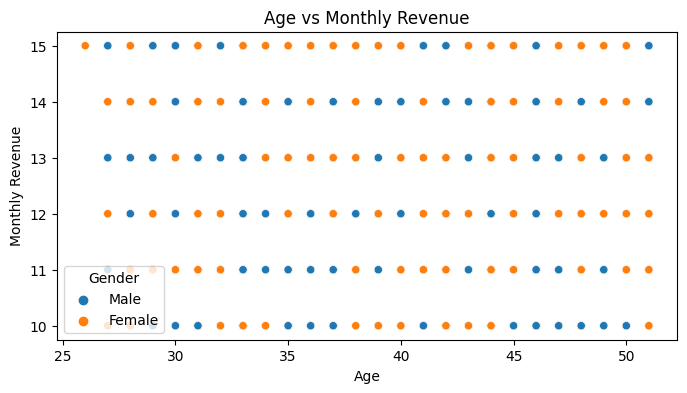

In [52]:
plt.figure(figsize = (8,4))
sns.scatterplot(x = "Age", y = "Monthly Revenue", hue = "Gender", data = df)
plt.title("Age vs Monthly Revenue")
plt.xlabel("Age")
plt.ylabel("Monthly Revenue")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

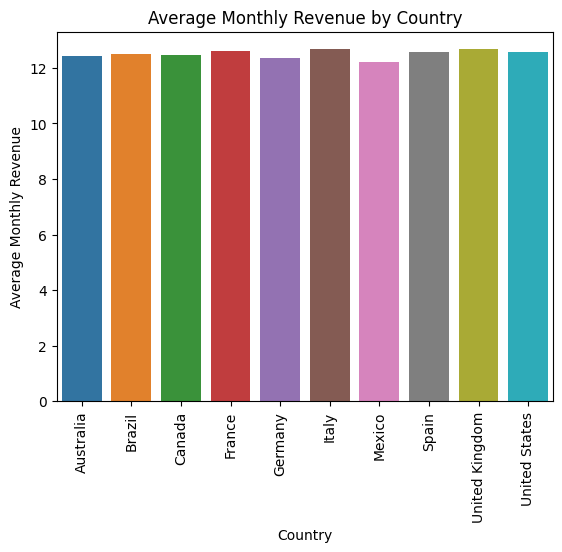

In [30]:
average_revenue_by_country = df.groupby("Country")["Monthly Revenue"].mean().reset_index()
sns.barplot(x = "Country", y = "Monthly Revenue", data=average_revenue_by_country)
plt.title("Average Monthly Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Average Monthly Revenue")
plt.xticks(rotation = 90)
plt.show

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


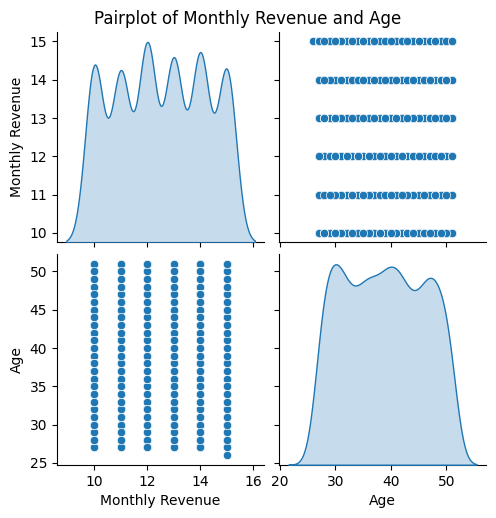

In [37]:
numerical_columns = ["Monthly Revenue", "Age"]
sns.pairplot(df[numerical_columns], diag_kind = "kde")
plt.suptitle("Pairplot of Monthly Revenue and Age", y= 1.02)
plt.show()



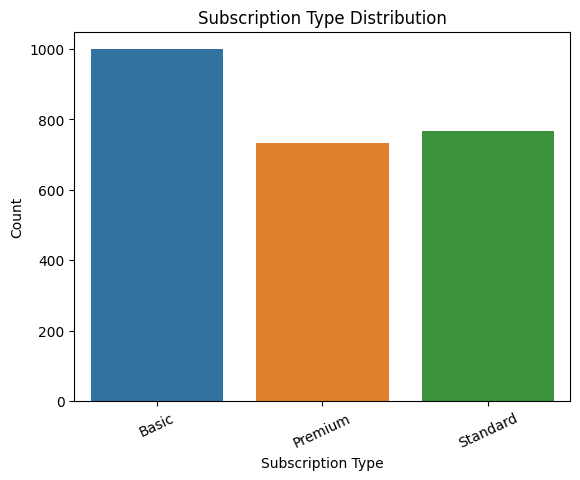

In [53]:
sns.countplot(x = "Subscription Type", data=df)
plt.title("Subscription Type Distribution")
plt.xlabel("Subscription Type")
plt.ylabel("Count")
plt.xticks(rotation = 25)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


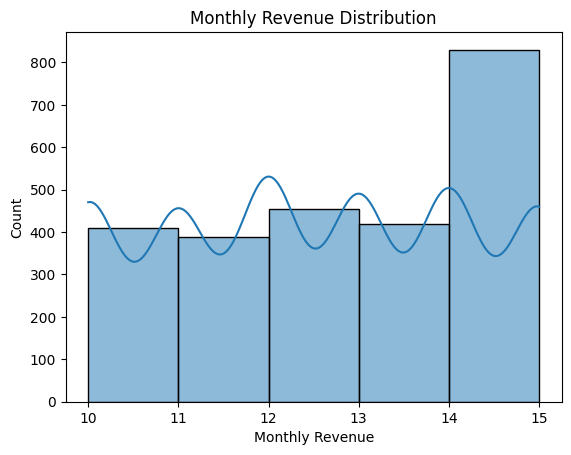

In [62]:
sns.histplot(df["Monthly Revenue"], bins=5, kde= True)
plt.title("Monthly Revenue Distribution")
plt.xlabel("Monthly Revenue")
plt.ylabel("Count")
plt.show()

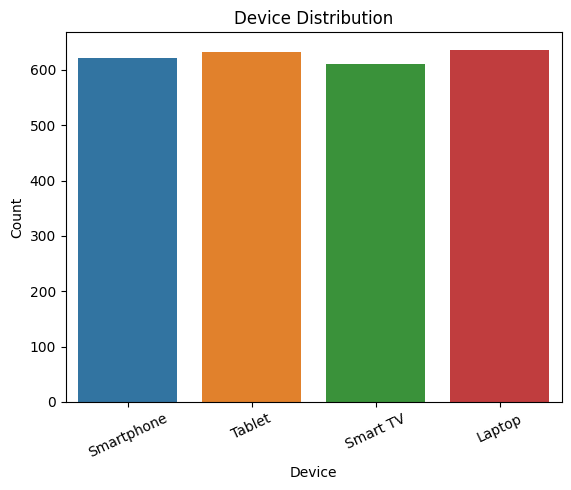

In [54]:
sns.countplot(x= "Device", data = df)
plt.title("Device Distribution")
plt.xlabel("Device")
plt.ylabel("Count")
plt.xticks(rotation = 25)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


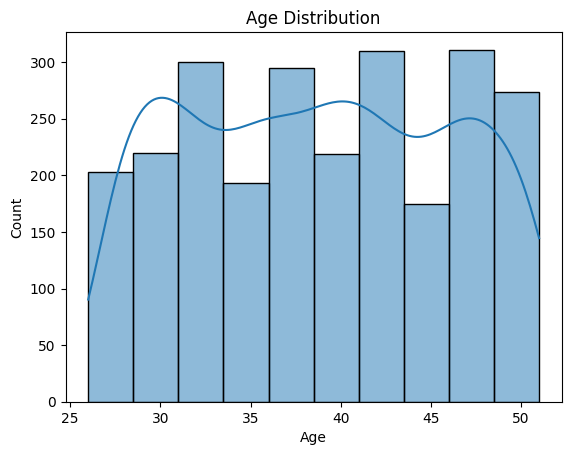

In [61]:
sns.histplot(df["Age"],bins= 10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
